In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")

In [12]:
def modelResult(y_test,y_pred):
    print("Test MAE:",metrics.mean_absolute_error(y_test, y_pred))
    print("Test MSE:", metrics.mean_squared_error(y_test, y_pred))
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print("RMSE: "+ str(rmse))
    r_squared = r2_score(y_test, y_pred)
    print("R-squared value: "+ str(r_squared))

In [14]:
file_url ='https://raw.githubusercontent.com/kumarlakshya24/Data-Science/master/training_data.csv?token=AE2ULA4HTYXHCN5E33F4EPS6OZV74'
data = pd.read_csv(file_url)

In [15]:
data.head(10)

,City,Property Type,Period Begin,Period End,Median Sale Price (in 000's of dollars)
0,Redmond,All Residential,4/1/17,4/30/17,735
1,Mercer Island,Condo/Co-op,11/1/17,11/30/17,389
2,Tacoma,Condo/Co-op,4/1/16,4/30/16,228
3,Bothell,All Residential,1/1/10,1/31/10,295
4,Tacoma,All Residential,1/1/10,1/31/10,179
5,Snoqualmie,All Residential,2/1/10,2/28/10,430
6,Redmond,All Residential,3/1/10,3/31/10,412
7,Tacoma,All Residential,3/1/10,3/31/10,184
8,Bellevue,All Residential,7/1/10,7/31/10,530
9,Mercer Island,All Residential,9/1/10,9/30/10,648


In [16]:
data.dtypes

City                                       object
Property Type                              object
Period Begin                               object
Period End                                 object
Median Sale Price (in 000's of dollars)    object
dtype: object

In [17]:
data.shape

(6347, 5)

### Data cleaning

In [8]:
data.isnull().sum()

City                                       0
Property Type                              0
Period Begin                               0
Period End                                 0
Median Sale Price (in 000's of dollars)    0
dtype: int64

In [9]:
data.isna().any()

City                                       False
Property Type                              False
Period Begin                               False
Period End                                 False
Median Sale Price (in 000's of dollars)    False
dtype: bool

In [10]:
data.drop_duplicates(inplace = True)

In [11]:
data.shape

(6347, 5)

In [18]:
data.rename(columns = {"Median Sale Price (in 000's of dollars)": "Median"}, inplace = True) 

In [13]:
data.dtypes

City             object
Property Type    object
Period Begin     object
Period End       object
Median           object
dtype: object

In [14]:
medianCount = data.groupby('Median')['City'].count()
medianCount

Median
1,000    4
1,001    1
1,003    2
1,004    1
1,005    3
1,008    1
1,010    3
1,012    1
1,013    1
1,015    1
1,018    1
1,020    1
1,025    5
1,027    1
1,030    1
1,033    3
1,035    2
1,038    1
1,040    2
1,042    1
1,045    2
1,048    2
1,050    4
1,052    2
1,055    2
1,057    1
1,060    1
1,070    1
1,071    1
1,072    1
        ..
960      2
961      2
963      2
965      2
966      1
967      1
968      2
969      1
970      2
971      1
975      4
976      1
977      2
978      2
979      1
98       4
980      3
981      1
983      1
985      2
986      2
987      1
988      2
99       2
990      4
993      3
994      2
995      3
997      1
998      2
Name: City, Length: 1011, dtype: int64

In [19]:
data["Median"] = data["Median"].str.replace(",","")
data["Median"] = data["Median"].str.replace("$","")
data["Median"] = data["Median"].str.replace("K","")
data["Median"] = data["Median"].str.replace("k","").astype(float)
data['Median'] = data['Median'].astype('float')

In [16]:
data.dtypes

City              object
Property Type     object
Period Begin      object
Period End        object
Median           float64
dtype: object

In [20]:
data.groupby(['City'])['Property Type'].count()

City
Bellevue         495
Bothell          493
Issaquah         480
Kenmore          441
Kent             510
Kirkland         491
Mercer Island    360
Olympia          560
Redmond          475
Sammamish        468
Seattle          585
Snoqualmie       404
Tacoma           585
Name: Property Type, dtype: int64

In [18]:
data.groupby(['Property Type'])['City'].count()

Property Type
All Residential              1521
Condo/Co-op                  1448
Multi-Family (2-4 Unit)       481
Single Family Residential    1521
Townhouse                    1376
Name: City, dtype: int64

In [21]:
data['start_year'] = pd.DatetimeIndex(data['Period Begin']).year
data['start_month'] = pd.DatetimeIndex(data['Period Begin']).month
data['end_year'] = pd.DatetimeIndex(data['Period Begin']).year
data['end_month'] = pd.DatetimeIndex(data['Period End']).month

In [22]:
data.drop(["Period Begin", "Period End"], axis = 1, inplace = True)

In [21]:
data.dtypes

City              object
Property Type     object
Median           float64
start_year         int64
start_month        int64
end_year           int64
end_month          int64
dtype: object

'City' and 'property Type' converted to quantitative below. 

In [23]:
data = pd.get_dummies(data,columns=["Property Type"],drop_first = True)

In [24]:
new_data = pd.get_dummies(data,columns=["City"],drop_first = True)

In [25]:
new_data.head(5)

,Median,start_year,start_month,end_year,end_month,Property Type_Condo/Co-op,Property Type_Multi-Family (2-4 Unit),Property Type_Single Family Residential,Property Type_Townhouse,City_Bothell,...,City_Kenmore,City_Kent,City_Kirkland,City_Mercer Island,City_Olympia,City_Redmond,City_Sammamish,City_Seattle,City_Snoqualmie,City_Tacoma
0,735.0,2017,4,2017,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,389.0,2017,11,2017,11,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,228.0,2016,4,2016,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,295.0,2010,1,2010,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,179.0,2010,1,2010,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
new_data.describe()

,Median,start_year,start_month,end_year,end_month,Property Type_Condo/Co-op,Property Type_Multi-Family (2-4 Unit),Property Type_Single Family Residential,Property Type_Townhouse,City_Bothell,...,City_Kenmore,City_Kent,City_Kirkland,City_Mercer Island,City_Olympia,City_Redmond,City_Sammamish,City_Seattle,City_Snoqualmie,City_Tacoma
count,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,...,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,444.927210,2014.412006,6.385221,2014.412006,6.385221,0.228139,0.075784,0.239641,0.216795,0.077674,...,0.069482,0.080353,0.077359,0.056720,0.088231,0.074839,0.073736,0.092170,0.063652,0.092170
std,267.248763,2.811484,3.404015,2.811484,3.404015,0.419666,0.264673,0.426898,0.412094,0.267680,...,0.254291,0.271860,0.267182,0.231324,0.283652,0.263151,0.261361,0.289288,0.244151,0.289288
min,46.000000,2010.000000,1.000000,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.000000,2012.000000,3.000000,2012.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,380.000000,2014.000000,6.000000,2014.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,570.000000,2017.000000,9.000000,2017.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2316.000000,2019.000000,12.000000,2019.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visualizations

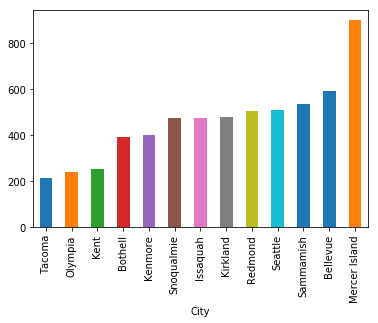

In [25]:
data.groupby("City")['Median'].mean().sort_values().plot(kind = "bar")

#### Above shows the median sale price for each city

start_year
2010    AxesSubplot(0.125,0.125;0.775x0.755)
2011    AxesSubplot(0.125,0.125;0.775x0.755)
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2019    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

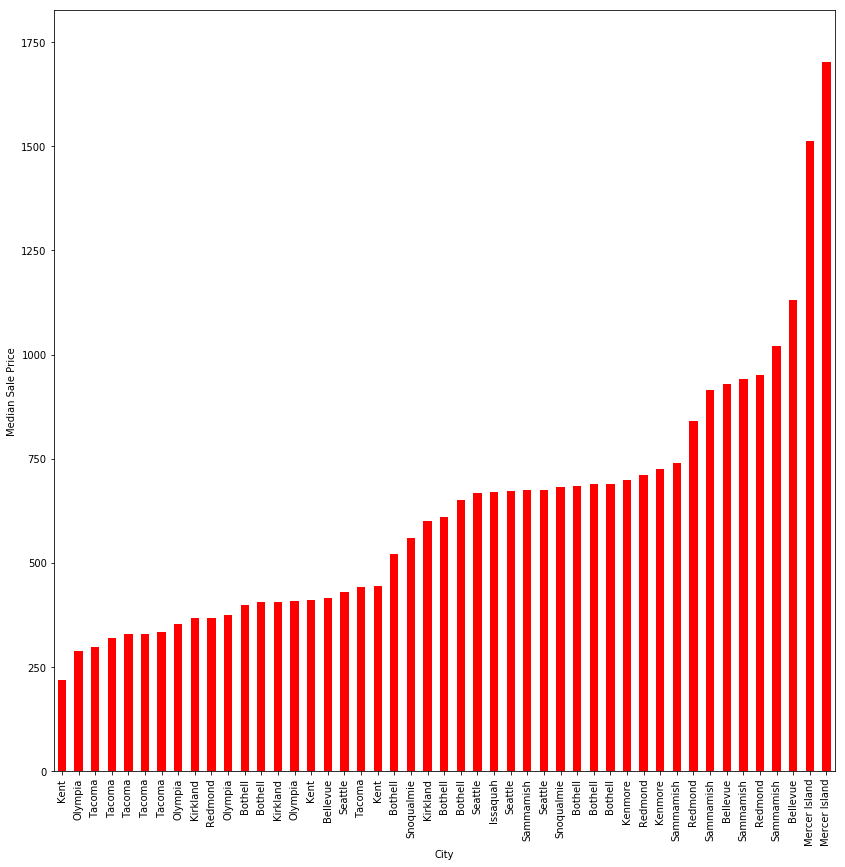

In [26]:
fig, ax = plt.subplots()
df1 = data.sample(n = 600, random_state = 6)
ax.set_ylabel('Median Sale Price')
df2 = df1.sort_values(by = 'Median', ascending = True)
df2.groupby('start_year').plot(kind = "bar", figsize = (14,14), x='City', y='Median', ax=ax, legend=False, colormap ='flag')

Text(0.5, 1.0, 'Median sale price changes through years 2010-2019')

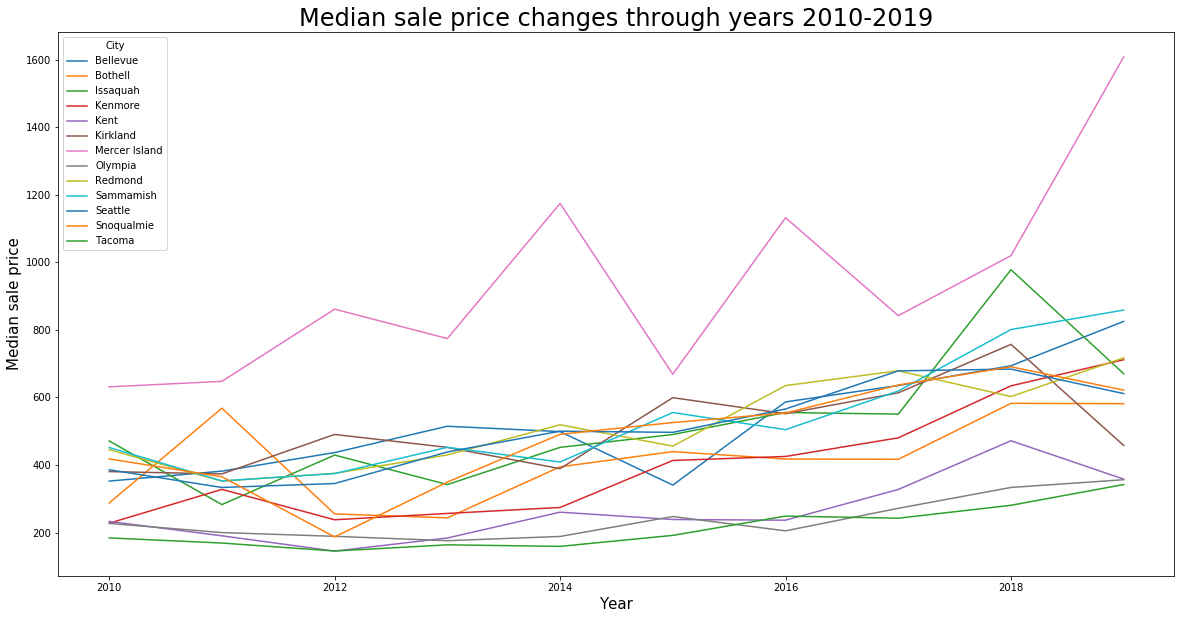

In [29]:
pd.pivot_table(df2, index="start_year", columns="City", values="Median").plot(kind = 'line', figsize = (20,10), legend = True)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Median sale price",  fontsize = 15)
plt.title("Median sale price changes through years 2010-2019", fontsize = 24)

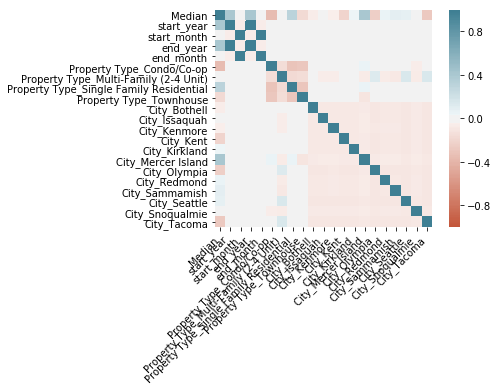

In [30]:
corr = new_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

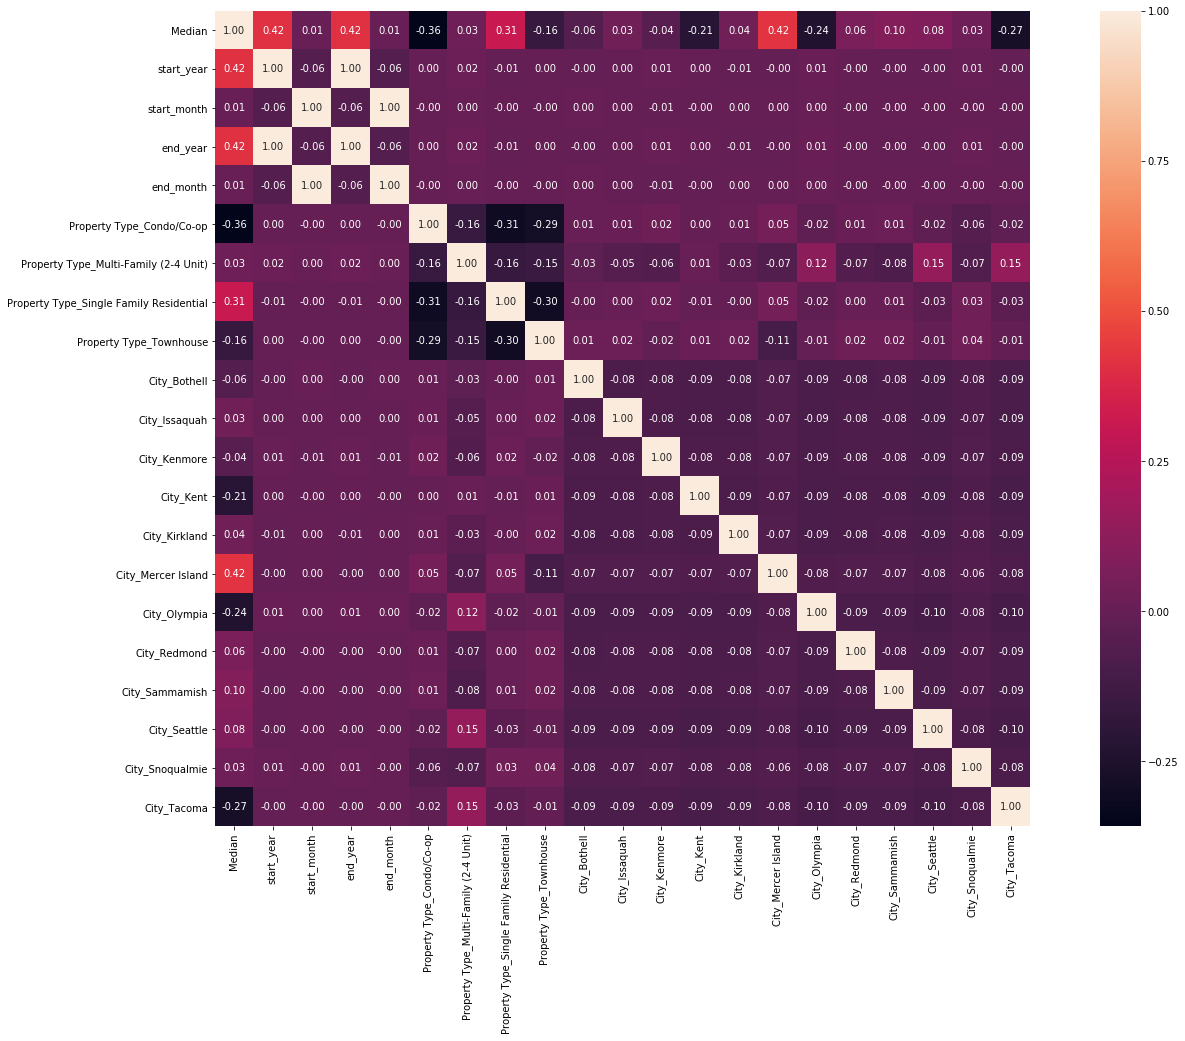

In [31]:
corrmat =new_data.corr()
fig,ax= plt.subplots()
fig.set_size_inches(25,15)
sns.heatmap(corrmat,square=True,annot=True, fmt='.2f')

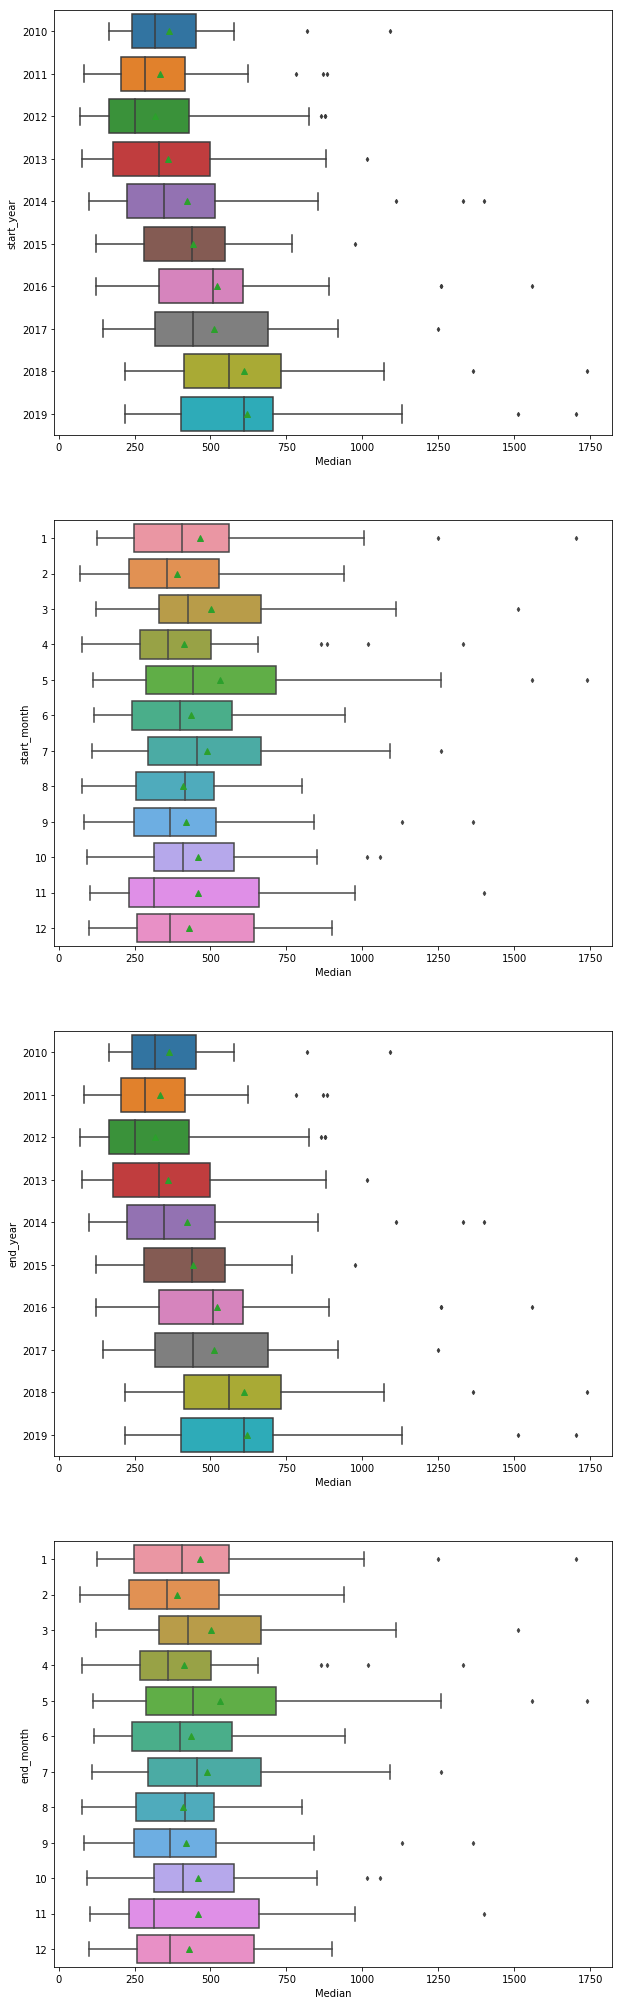

In [34]:
fig, axarr = plt.subplots(4, figsize=(10,36))
sns.boxplot(y = 'start_year', x = 'Median', data = df2,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'start_month', x = 'Median', data = df2,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'end_year', x = 'Median', data = df2,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
sns.boxplot(y = 'end_month', x = 'Median', data = df2,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])
plt.show()

### Corelation values of each coefficient with respect to median sale price

In [27]:
corr_matrix = new_data.corr()
cor_target=abs(corr_matrix["Median"]).sort_values(ascending=False)
cor_target

Median                                     1.000000
City_Mercer Island                         0.418228
start_year                                 0.415719
end_year                                   0.415719
Property Type_Condo/Co-op                  0.358083
Property Type_Single Family Residential    0.314521
City_Tacoma                                0.274846
City_Olympia                               0.238237
City_Kent                                  0.210604
Property Type_Townhouse                    0.159260
City_Sammamish                             0.096154
City_Seattle                               0.078667
City_Redmond                               0.062373
City_Bothell                               0.056100
City_Kenmore                               0.042857
City_Kirkland                              0.039412
City_Issaquah                              0.032994
City_Snoqualmie                            0.027226
Property Type_Multi-Family (2-4 Unit)      0.027157
end_month   

Text(0.5, 1.0, 'Correlation between median sale price and most positive correlated variables')

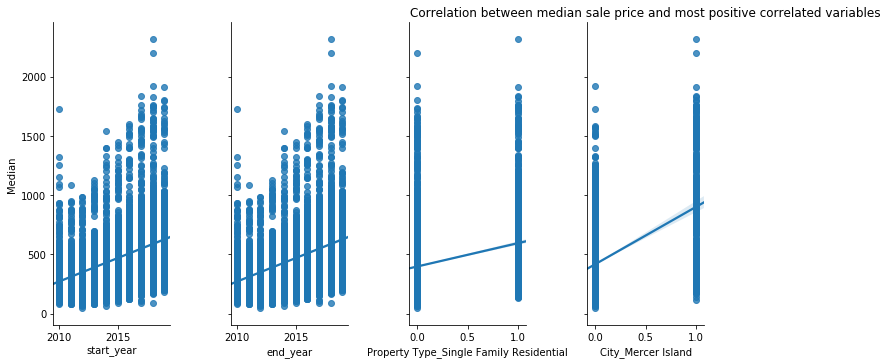

In [40]:
sns.pairplot(
    new_data,
    kind="reg",
    x_vars=['start_year','end_year','Property Type_Single Family Residential','City_Mercer Island'],
    y_vars='Median',
    size=5,
    aspect=0.5)
plt.title('Correlation between median sale price and most positive correlated variables')

Text(0.5, 1.0, 'Correlation between median sale price and medium correlated variables')

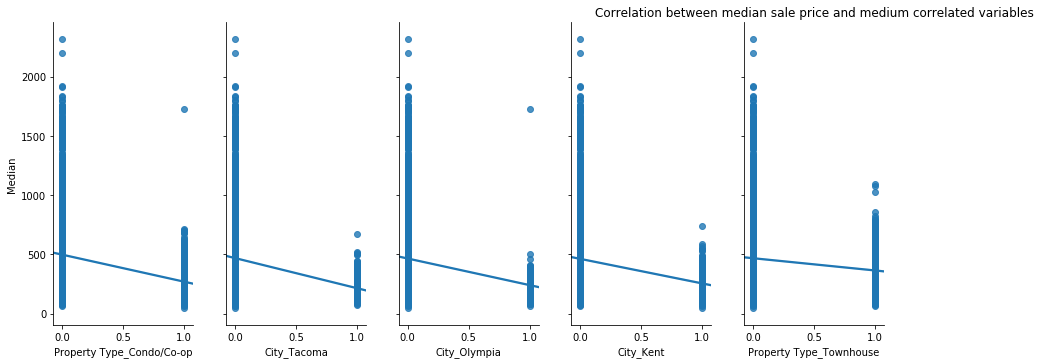

In [41]:
sns.pairplot(
    new_data,
    kind="reg",
    x_vars=['Property Type_Condo/Co-op','City_Tacoma','City_Olympia','City_Kent', 'Property Type_Townhouse'],
    y_vars='Median',
    size=5,
    aspect=0.5)
plt.title('Correlation between median sale price and medium correlated variables')

Text(0.5, 1.0, 'Correlation between median sale price and least correlated variables')

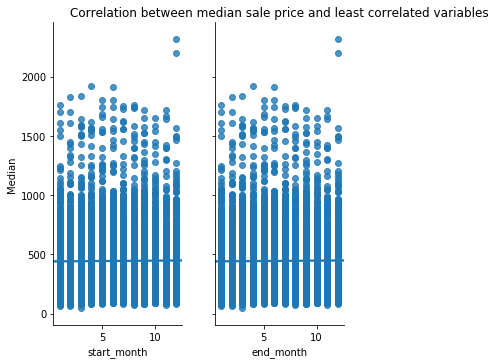

In [42]:
sns.pairplot(
    new_data,
    kind="reg",
    x_vars=['start_month','end_month'],
    y_vars='Median',
    size=5,
    aspect=0.5)
plt.title('Correlation between median sale price and least correlated variables')

### Analysing skewness

In [29]:
new_data.skew(axis = 0, skipna = True)

Median                                     1.663542
start_year                                 0.005891
start_month                                0.034475
end_year                                   0.005891
end_month                                  0.034475
Property Type_Condo/Co-op                  1.296014
Property Type_Multi-Family (2-4 Unit)      3.206600
Property Type_Single Family Residential    1.220157
Property Type_Townhouse                    1.374898
City_Bothell                               3.156448
City_Issaquah                              3.210857
City_Kenmore                               3.387091
City_Kent                                  3.088200
City_Kirkland                              3.164689
City_Mercer Island                         3.833749
City_Olympia                               2.904253
City_Redmond                               3.232327
City_Sammamish                             3.262913
City_Seattle                               2.820436
City_Snoqual

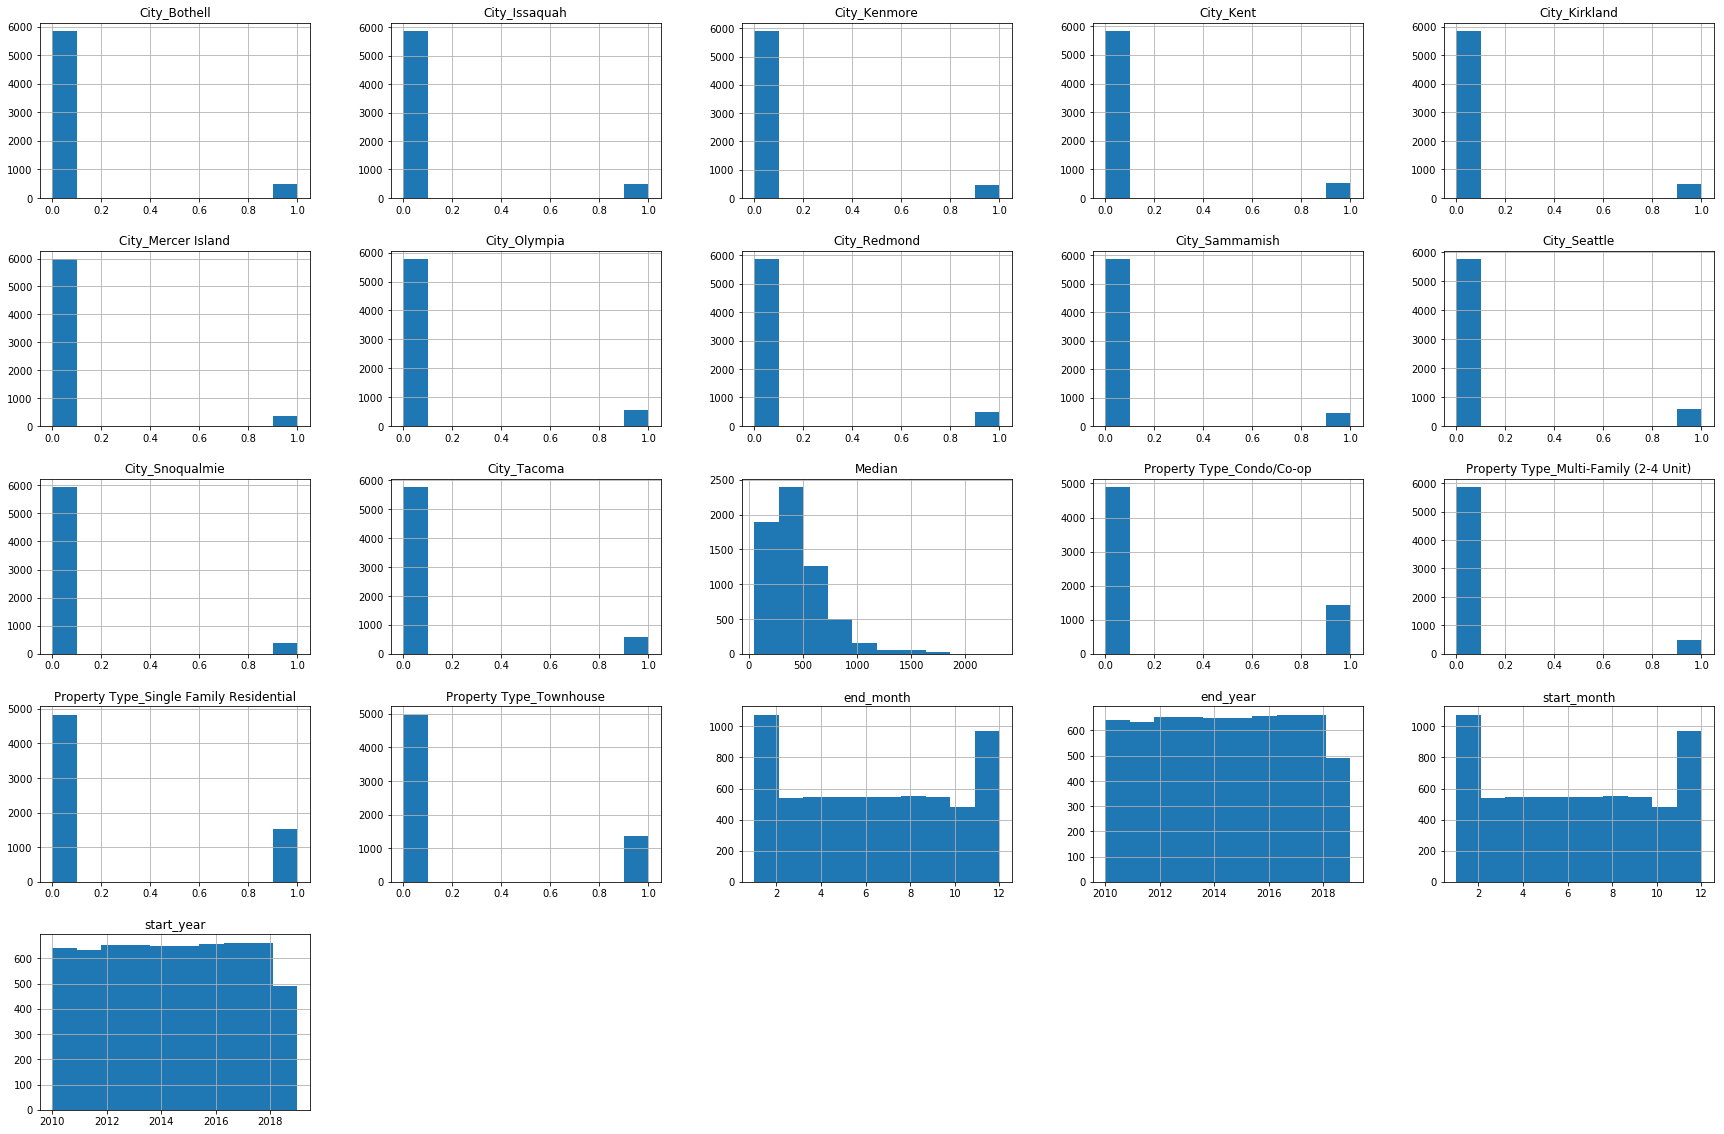

In [38]:
new_data.hist(bins=10, figsize=(30,20))
plt.show()

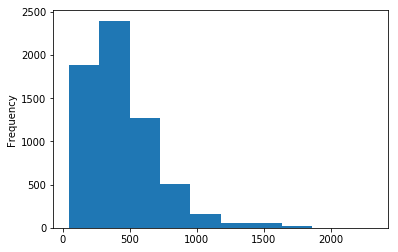

In [44]:
new_data['Median'].plot(kind='hist',bins=10)

#### Its seen that Median is highly skewed. Taking log to overcome it.

In [30]:
new_data.loc[:,'Median'] = np.log(new_data['Median'])

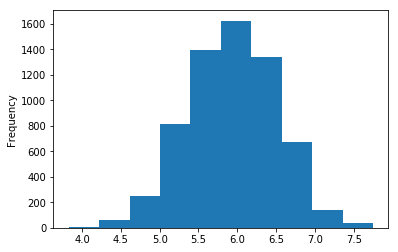

In [46]:
new_data['Median'].plot(kind='hist',bins=10)

## Model Implementation

## Linear Regression

### Few features - 4

In [47]:
X = new_data[['start_year','end_year','Property Type_Single Family Residential','City_Mercer Island']]
y = new_data['Median']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)
X_train.head()

,start_year,end_year,Property Type_Single Family Residential,City_Mercer Island
4085,2015,2015,0,0
3054,2019,2019,0,0
1156,2016,2016,0,0
992,2017,2017,0,0
3957,2019,2019,0,0


In [48]:
print(X_train.shape)
print(X_test.shape)

(5077, 4)
(1270, 4)


In [49]:
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
y_pred = linreg.predict(X_test)
modelResult(y_test,y_pred)

Test MAE: 0.38200257893513945
Test MSE: 0.21171396166446949
RMSE: 0.46012385470052464
R-squared value: 0.38375691153539393


### Cross validation with few features

In [53]:
scores = cross_val_score( linreg, X, y, cv=11, scoring='neg_mean_squared_error')
print("MSE:", -scores.mean())

MSE: 0.20707575919022092


In [54]:
X = new_data[['start_year','end_year','Property Type_Single Family Residential','City_Mercer Island']]
y = new_data['Median']
linreg= LinearRegression()
linreg.fit(X,y)

print(linreg.intercept_)
print(linreg.coef_)

X_withConstant= sm.add_constant(X)
est_log=sm.OLS(y,X_withConstant)
est2_log= est_log.fit()
print(est2_log.summary())

-171.75227207144593
[0.04407005 0.04407005 0.40908153 0.71182893]
                            OLS Regression Results                            
Dep. Variable:                 Median   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     1242.
Date:                Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:43:36   Log-Likelihood:                -3990.0
No. Observations:                6347   AIC:                             7988.
Df Residuals:                    6343   BIC:                             8015.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

### Few Features - 18

In [59]:
X = new_data[['City_Mercer Island','start_year','end_year','Property Type_Condo/Co-op','Property Type_Single Family Residential',
              'City_Tacoma','City_Olympia','City_Kent','Property Type_Townhouse','City_Sammamish','City_Seattle','City_Redmond',
              'City_Bothell','City_Kenmore','City_Kirkland','City_Issaquah','City_Snoqualmie','Property Type_Multi-Family (2-4 Unit)']]
y = new_data['Median']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_pred = linreg.predict(X_test)
modelResult(y_test,y_pred)

Test MAE: 0.14944351845784173
Test MSE: 0.041318874558622945
RMSE: 0.20327044684022058
R-squared value: 0.8637282989966446


In [62]:
scores = cross_val_score( linreg, X, y, cv=11, scoring='neg_mean_squared_error')
print("MSE:", -scores.mean())

MSE: 0.0476280459656089


In [63]:
import statsmodels.api as sm
X = new_data[['City_Mercer Island','start_year','end_year','Property Type_Condo/Co-op','Property Type_Single Family Residential',
              'City_Tacoma','City_Olympia','City_Kent','Property Type_Townhouse','City_Sammamish','City_Seattle','City_Redmond',
              'City_Bothell','City_Kenmore','City_Kirkland','City_Issaquah','City_Snoqualmie','Property Type_Multi-Family (2-4 Unit)']]
y = new_data['Median']
linreg= LinearRegression()
linreg.fit(X,y)

X_withConstant= sm.add_constant(X)
est_log=sm.OLS(y,X_withConstant)
est2_log= est_log.fit()
print(est2_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 Median   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     2221.
Date:                Sat, 21 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:47:04   Log-Likelihood:                 703.19
No. Observations:                6347   AIC:                            -1370.
Df Residuals:                    6329   BIC:                            -1249.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### All Features - 20

In [64]:
X = new_data[['City_Mercer Island','start_year','end_year','Property Type_Condo/Co-op','Property Type_Single Family Residential',
              'City_Tacoma','City_Olympia','City_Kent','Property Type_Townhouse','City_Sammamish','City_Seattle','City_Redmond',
              'City_Bothell','City_Kenmore','City_Kirkland','City_Issaquah','City_Snoqualmie','Property Type_Multi-Family (2-4 Unit)',
              'start_month','end_month']]
y = new_data['Median']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
y_pred = linreg.predict(X_test)
y_train_pred = linreg.predict(X_train)
modelResult(y_test,y_pred)

Test MAE: 0.15420316258509292
Test MSE: 0.042937198573510034
RMSE: 0.20721293051716158
R-squared value: 0.8690945888485037


### Cross Validation for all features.

In [67]:
scores = cross_val_score(linreg, X, y, cv=11, scoring='neg_mean_squared_error')
print("MSE:", -scores.mean())

MSE: 0.04858842515593191


In [68]:
import statsmodels.api as sm
X = new_data[['City_Mercer Island','start_year','end_year','Property Type_Condo/Co-op','Property Type_Single Family Residential',
              'City_Tacoma','City_Olympia','City_Kent','Property Type_Townhouse','City_Sammamish','City_Seattle','City_Redmond',
              'City_Bothell','City_Kenmore','City_Kirkland','City_Issaquah','City_Snoqualmie','Property Type_Multi-Family (2-4 Unit)',
              'start_month','end_month']]
y = new_data['Median']
linreg= LinearRegression()
linreg.fit(X,y)

X_withConstant= sm.add_constant(X)
est_log=sm.OLS(y,X_withConstant)
est2_log= est_log.fit()
print(est2_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 Median   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     2118.
Date:                Sat, 21 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:47:12   Log-Likelihood:                 729.18
No. Observations:                6347   AIC:                            -1420.
Df Residuals:                    6328   BIC:                            -1292.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Including all features gives a better result.  So all features are included.

## Ridge Regression

### All features - 20

In [69]:
X = new_data[['City_Mercer Island','start_year','end_year','Property Type_Condo/Co-op','Property Type_Single Family Residential',
              'City_Tacoma','City_Olympia','City_Kent','Property Type_Townhouse','City_Sammamish','City_Seattle','City_Redmond',
              'City_Bothell','City_Kenmore','City_Kirkland','City_Issaquah','City_Snoqualmie','Property Type_Multi-Family (2-4 Unit)',
             'start_month','end_month']]
y = new_data['Median']

In [70]:
ridge_reg=Ridge();
ridge_reg.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [71]:
y_pred = ridge_reg.predict(X_test)
modelResult(y_test,y_pred)

Test MAE: 0.15431702238391212
Test MSE: 0.04298250181107632
RMSE: 0.20732221736002227
R-squared value: 0.8689564699414224


In [71]:
scores = cross_val_score(ridge_reg, X, y, cv=11, scoring='neg_mean_squared_error')
print("MSE:", -scores.mean())

MSE: 0.047260757634037365


### Ridge - alpha 0.05 with all features

In [72]:
ridge_reg=Ridge(alpha=0.05, normalize=True);
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [73]:
y_pred = ridge_reg.predict(X_test)
modelResult(y_test,y_pred)

Test MAE: 0.1616046510138243
Test MSE: 0.04601448851357285
RMSE: 0.21450987975749009
R-squared value: 0.8570861454397811


## Lasso Regression

In [74]:
lasso_reg = Lasso(alpha=0.01)
lasso=lasso_reg.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
modelResult(y_test,y_pred)

Test MAE: 0.19310536805413225
Test MSE: 0.06088394054132576
RMSE: 0.2467467133343943
R-squared value: 0.8109039368978432


In [75]:
scores = cross_val_score(lasso, X, y, cv=11, scoring='neg_mean_squared_error')
print("MSE:", -scores.mean())

MSE: 0.06332618136434327


## Polynomial Regression

### All Features

In [76]:
new_data.head(5)

,Median,start_year,start_month,end_year,end_month,Property Type_Condo/Co-op,Property Type_Multi-Family (2-4 Unit),Property Type_Single Family Residential,Property Type_Townhouse,City_Bothell,...,City_Kenmore,City_Kent,City_Kirkland,City_Mercer Island,City_Olympia,City_Redmond,City_Sammamish,City_Seattle,City_Snoqualmie,City_Tacoma
0,6.599870,2017,4,2017,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5.963579,2017,11,2017,11,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5.429346,2016,4,2016,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5.686975,2010,1,2010,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5.187386,2010,1,2010,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Degree 1

In [72]:
linreg=LinearRegression()
polynomial = PolynomialFeatures(degree=1)
poly_train = polynomial.fit_transform(X_train)
poly_test = polynomial.fit_transform(X_test)
poly = linreg.fit(poly_train, y_train)
y_pred = poly.predict(poly_test)
modelResult(y_test,y_pred)

Test MAE: 0.15420316258509295
Test MSE: 0.04293719857350999
RMSE: 0.20721293051716147
R-squared value: 0.8690945888485038


In [73]:
scores = cross_val_score(poly, poly_train, y_train, cv=11, scoring='neg_mean_squared_error')
print("MSE:", -scores.mean())

MSE: 0.04777025404094451


#### Degree 3

In [74]:
linreg=LinearRegression()
polynomial = PolynomialFeatures(degree=3)
poly_train = polynomial.fit_transform(X_train)
poly_test = polynomial.fit_transform(X_test)
poly = linreg.fit(poly_train, y_train)
y_pred = poly.predict(poly_test)
modelResult(y_test,y_pred)

Test MAE: 0.10224796391495741
Test MSE: 0.022947592030629117
RMSE: 0.1514846263837658
R-squared value: 0.9300381936990274


In [75]:
scores = cross_val_score(poly, poly_train, y_train, cv=11, scoring='neg_mean_squared_error')
print("MSE:", -scores.mean())

MSE: 0.02407526037791399


## Loading test dataset for predicting median sale price

In [78]:
file_url ='https://raw.githubusercontent.com/kumarlakshya24/Data-Science/master/test.csv?token=AE2ULA2WWHUIHT3G6RR4V326OZXTO'
data = pd.read_csv(file_url)

In [79]:
data.dtypes

City                                       object
Property Type                              object
Period Begin                               object
Period End                                 object
Median Sale Price (in 000's of dollars)    object
dtype: object

In [80]:
data.isnull().sum()

City                                       0
Property Type                              0
Period Begin                               0
Period End                                 0
Median Sale Price (in 000's of dollars)    0
dtype: int64

In [81]:
data.isna().any()

City                                       False
Property Type                              False
Period Begin                               False
Period End                                 False
Median Sale Price (in 000's of dollars)    False
dtype: bool

In [82]:
data.rename(columns = {"Median Sale Price (in 000's of dollars)": "Median"}, inplace = True) 

In [83]:
data.dtypes

City             object
Property Type    object
Period Begin     object
Period End       object
Median           object
dtype: object

In [84]:
data["Median"] = data["Median"].str.replace(",","")
data["Median"] = data["Median"].str.replace("$","")
data["Median"] = data["Median"].str.replace("K","")
data["Median"] = data["Median"].str.replace("k","").astype(float)
data['Median'] = data['Median'].astype('float')

In [85]:
data['start_year'] = pd.DatetimeIndex(data['Period Begin']).year
data['start_month'] = pd.DatetimeIndex(data['Period Begin']).month
data['end_year'] = pd.DatetimeIndex(data['Period Begin']).year
data['end_month'] = pd.DatetimeIndex(data['Period End']).month

In [86]:
data.drop(["Period Begin", "Period End"], axis = 1, inplace = True)

In [87]:
data.dtypes

City              object
Property Type     object
Median           float64
start_year         int64
start_month        int64
end_year           int64
end_month          int64
dtype: object

In [88]:
data = pd.get_dummies(data,columns=["Property Type"],drop_first = True)

In [89]:
data = pd.get_dummies(data,columns=["City"],drop_first = True)

In [90]:
data.loc[:,'Median'] = np.log(data['Median'])

In [92]:
data.head(5)

,Median,start_year,start_month,end_year,end_month,Property Type_Condo/Co-op,Property Type_Multi-Family (2-4 Unit),Property Type_Single Family Residential,Property Type_Townhouse,City_Bothell,...,City_Kenmore,City_Kent,City_Kirkland,City_Mercer Island,City_Olympia,City_Redmond,City_Sammamish,City_Seattle,City_Snoqualmie,City_Tacoma
0,5.874931,2020,1,2020,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,6.470800,2020,1,2020,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,5.799093,2020,1,2020,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,6.194405,2020,1,2020,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5.843544,2020,1,2020,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [93]:
X = data[['City_Mercer Island','start_year','end_year','Property Type_Condo/Co-op','Property Type_Single Family Residential',
              'City_Tacoma','City_Olympia','City_Kent','Property Type_Townhouse','City_Sammamish','City_Seattle','City_Redmond',
              'City_Bothell','City_Kenmore','City_Kirkland','City_Issaquah','City_Snoqualmie','Property Type_Multi-Family (2-4 Unit)',
               'start_month','end_month']]
y = data['Median']

In [94]:
linreg=LinearRegression()
polynomial = PolynomialFeatures(degree=3)
poly_train = polynomial.fit_transform(X_train)
poly_test = polynomial.fit_transform(X)
poly = linreg.fit(poly_train, y_train)
y_pred = poly.predict(poly_test)
modelResult(y,y_pred)

Test MAE: 0.11689440771808039
Test MSE: 0.021624705142205963
RMSE: 0.14705340914853338
R-squared value: 0.8899036308897353


In [97]:
y_pred

array([5.72496601, 6.42998422, 5.80307547, 6.0100625 , 5.71631209,
       6.59200065, 6.56785515, 6.38758582, 5.29661149, 6.13381677,
       5.72975178, 6.67485828, 6.17811856, 5.98732354, 6.91532807,
       6.0807596 , 5.70712023, 6.00364507, 5.44508353, 5.57291198,
       5.72678766, 6.56567216, 6.77189919, 6.45765454, 7.02837102,
       6.78087987, 6.21154299, 7.28273144, 6.60039051, 6.48174122,
       6.51909091, 6.43515107, 6.47605457, 5.91103126, 6.00059279,
       6.5085204 , 6.29305277, 6.48982537, 6.02655322, 6.46677263,
       6.74062667, 6.67706322, 5.68264821, 6.16884062, 6.70073486,
       6.4255018 , 6.14843309, 7.39557341, 5.81825927, 6.37041439,
       6.80341258, 6.4565351 , 5.77695115])

In [98]:
y_pred_result=np.exp(y_pred)
y_pred_result

array([ 306.42284921,  620.16416367,  331.31694875,  407.50879064,
        303.7825325 ,  729.23836371,  711.84140854,  594.41981114,
        199.65911584,  461.19307584,  307.89283507,  792.23516702,
        482.08409051,  398.34702249, 1007.6015414 ,  437.36128975,
        301.00299912,  404.90200148,  231.61662642,  263.19941623,
        306.98155375,  710.28916582,  872.96825302,  637.56392052,
       1128.19131692,  880.84341427,  498.46979214, 1454.9567294 ,
        735.38230916,  653.10716231,  677.9617765 ,  623.37674718,
        649.4037069 ,  369.08658522,  403.66801166,  670.8331171 ,
        540.80175717,  658.40837641,  414.2846166 ,  643.40387311,
        846.09078667,  793.98392506,  293.72624908,  477.63202826,
        813.00305312,  617.39054936,  467.98352183, 1628.75860422,
        336.38598742,  584.29990962,  900.91649709,  636.85060859,
        322.77360134])

## Forming dataset to predict the median sale price for each city by property type for four months from Oct 2019 to Jan 2020

In [31]:
url='https://raw.githubusercontent.com/kumarlakshya24/Data-Science/master/NewTestData.csv?token=AE2ULA3YJ55IE2TTHXH2R3C6OZWUK'
data = pd.read_csv(url)

In [32]:
data_input = pd.read_csv(url)

In [33]:
data.dtypes

City             object
Property Type    object
Period Begin     object
Period End       object
dtype: object

In [34]:
data['start_year'] = pd.DatetimeIndex(data['Period Begin']).year
data['start_month'] = pd.DatetimeIndex(data['Period Begin']).month
data['end_year'] = pd.DatetimeIndex(data['Period Begin']).year
data['end_month'] = pd.DatetimeIndex(data['Period End']).month

In [35]:
for index, row in data.iterrows():
    if ((not pd.isna(row['start_year']) and not pd.isna(row['start_month']))
        or (not pd.isna(row['end_year']) and not pd.isna(row['end_month']))):
        if (pd.isna(row['start_year'])):
            data.at[index, 'start_year'] = row['end_year']
        if (pd.isna(row['start_month'])):
            data.at[index, 'start_month'] = row['end_month']
        if (pd.isna(row['end_year'])):
            data.at[index, 'end_year'] = row['start_year']
        if (pd.isna(row['end_month'])):
            data.at[index, 'end_month'] = row['start_month']

In [36]:
data['start_year']=data['start_year'].fillna(math.floor(data['start_year'].median()))
data['start_month']=data['start_month'].fillna(math.floor(data['start_month'].median()))
data['end_year']=data['end_year'].fillna(math.floor(data['end_year'].median()))
data['end_month']=data['end_month'].fillna(math.floor(data['end_month'].median()))

In [37]:
data.drop(["Period Begin", "Period End"], axis = 1, inplace = True)

In [38]:
data = pd.get_dummies(data,columns=["Property Type"],drop_first = True)

In [39]:
data = pd.get_dummies(data,columns=["City"],drop_first = True)

In [40]:
X = data[['City_Mercer Island','start_year','end_year','Property Type_Condo/Co-op','Property Type_Single Family Residential',
              'City_Tacoma','City_Olympia','City_Kent','Property Type_Townhouse','City_Sammamish','City_Seattle','City_Redmond',
              'City_Bothell','City_Kenmore','City_Kirkland','City_Issaquah','City_Snoqualmie','Property Type_Multi-Family (2-4 Unit)',
               'start_month','end_month']]


In [41]:
linreg=LinearRegression()
polynomial = PolynomialFeatures(degree=3)
poly_train = polynomial.fit_transform(X_train)
poly_test = polynomial.fit_transform(X)
poly = linreg.fit(poly_train, y_train)
y_pred = poly.predict(poly_test)

NameError: name 'X_train' is not defined

In [42]:
y_pred

NameError: name 'y_pred' is not defined

In [111]:
y_pred_result=np.exp(y_pred)
y_pred_result=y_pred_result.astype(int)

In [112]:
y_pred_result

array([ 821,  408, 1053,  925,  646, 1477,  548, 2082, 1578, 1221,  310,
        273,  416,  308,  278,  651,  498,  694,  685,  485,  684,  500,
        274,  719,  612,  869,  499, 1227, 1076,  699,  434,  253,  471,
        457,  331,  750,  411, 1916,  866,  628,  702,  410,  926,  849,
        647,  649,  487,  985,  705,  721,  304,  196,  333,  304,  263,
        919,  452, 1297, 1001,  668,  655,  354,  239,  691,  548,  808,
        399, 1089,  909,  642, 1473,  553, 2128, 1574, 1295,  302,  263,
        416,  301,  273,  652,  501,  689,  688,  492,  674,  497,  241,
        711,  611,  853,  490, 1235, 1055,  696,  434,  254,  466,  459,
        335,  744,  410, 1972,  855,  635,  693,  407,  966,  840,  652,
        636,  477,  993,  694,  720,  294,  188,  330,  295,  259,  919,
        451, 1330, 1006,  676,  648,  354,  223,  684,  554,  795,  389,
       1131,  895,  640, 1476,  560, 2195, 1580, 1383,  293,  252,  417,
        295,  269,  655,  507,  690,  694,  503,  6

In [114]:
data_input["Median Sale Price (in 000's of dollars)"] = y_pred_result

In [115]:
data_input.head(5)

,City,Property Type,Period Begin,Period End,Median Sale Price (in 000's of dollars)
0,Redmond,All Residential,10/1/2019,10/31/2019,821
1,Redmond,Condo/Co-op,10/1/2019,10/31/2019,408
2,Redmond,Multi-Family (2-4 Unit),10/1/2019,10/31/2019,1053
3,Redmond,Single Family Residential,10/1/2019,10/31/2019,925
4,Redmond,Townhouse,10/1/2019,10/31/2019,646


In [116]:
data_input.to_csv('C:/Users/Divya/Desktop/Price_Predicted.csv', index=False)

#### Conclusion:

Data Preprocessing and Fitting: Used bar and box plots to inspect any outliers in the data. The training and test data is split 80% and 20% respectively for training our model. Compared RMSE values to understand average error, while the accuracy metric was calculated with Mean Absolute error. R-squared value is used as an accuracy measure to interpret overall model performance.

We have used the following metrics in our project: Linear Regression, for optimization we used Lasso and Ridge Regression which reduced the variance in the model and used Polynomial Regression with varying degrees: Degree 1 and Degree 3 with which we wanted to observe if there is a better explanation of the variance with increasing degree of polynomial selected features.

The degree 3 Polynomial feature approach outperformed other approaches with a R-squared value of 0.929.

Any identifiable null values in the test data have been handled by using fillna function and the final predictions for each city and property type from October 2019 to January 2020 are stored in the Price_Predicted file with Median Sale Price as integer values.